### Señales Electricas 2024
***
#### Trabajo Practico 14

In [1016]:
import numpy as np
import serial 
import matplotlib.pyplot as plt
import scipy.signal
from scipy.fft import fft, fftfreq, fftshift, ifft
from IPython.display import Audio


In [1017]:
def tomaLecturas(puerto:str,cantidad:int,ancho:int=2,orden:str='little')-> np.ndarray:
    """
    Realiza la captura de una n datos de un puerto COM de la PC.
    
    Parameters:
    ----------
    puerto: str
        puerto de la PC de donde se leen los datos. ejmplo "COM6" 
    cantidad: int
        cantida de lecturas a realizar.
    ancho :int
        cantidad de byte a leidos en cada lectura
    orden: str
    
    Return:
    ------
    señal: array (1D)
        señal de capturada
    
    """
    with serial.Serial(puerto) as s:
        datos=s.read(ancho*cantidad)
    señal_capturada =np.array([ int.from_bytes(datos[ancho*i:ancho*(i+1)],orden,signed=False) for i in range(cantidad)]) 
    
    return señal_capturada

In [1018]:
cantidad_bytes = 60*4096
datos = tomaLecturas("COM6",cantidad_bytes) # Cambiar segun el puerto de la pc.


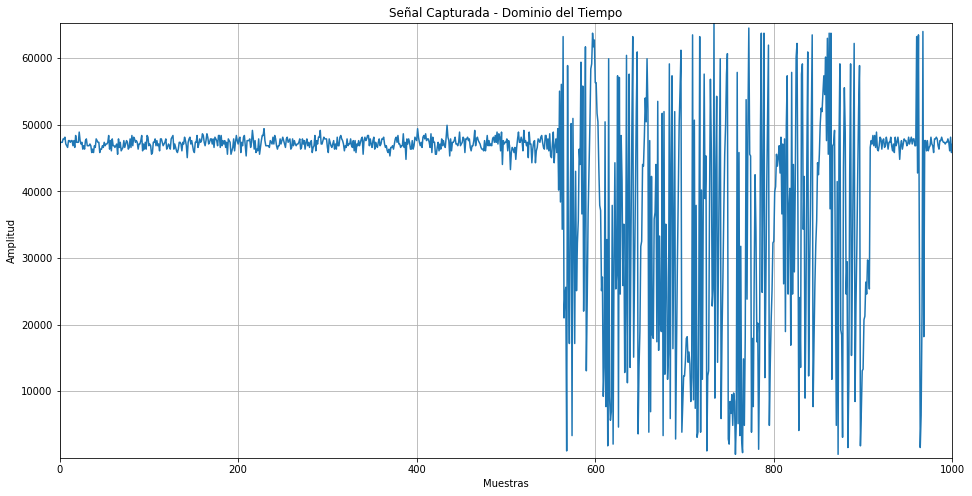

In [1019]:
#Visualizacion de la señal capturada en el dominio del Tiempo
plt.figure(figsize=(16, 8))
plt.plot(datos)
plt.title('Señal Capturada - Dominio del Tiempo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)


#plt.xlim(0, len(datos))  # Ajusta el límite del eje x según el tamaño de la señal
#plt.ylim(min(datos), max(datos))  # Ajusta el límite del eje y según los valores mínimos y máximos de la señal

plt.xlim(0, 1000)  # Ajusta el límite del eje x según el tamaño de la señal
plt.ylim(min(datos), max(datos))  # Ajusta el límite del eje y según los valores mínimos y máximos de la señal

plt.show()


In [1020]:
# Cálculo del espectro de frecuencia
n = len(datos)
fs = 50000  # Frecuencia de muestreo (ajustar según tu caso)
freq = fftfreq(n, d=1/fs)
espectro = np.abs(fft(datos))

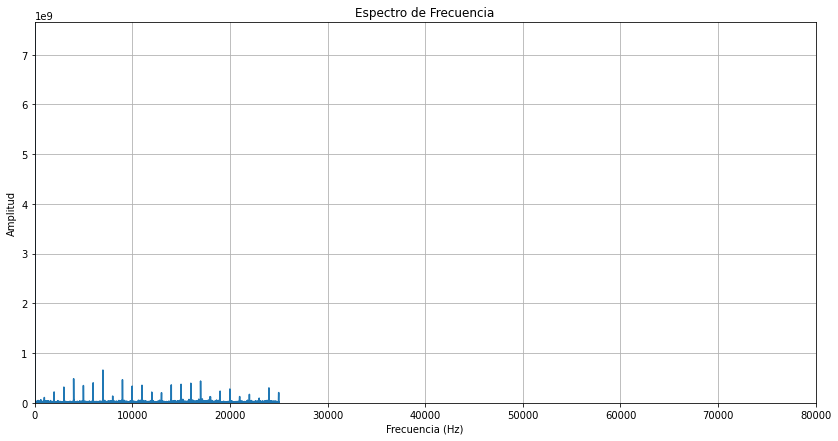

In [1021]:
# Visualización en el dominio de la frecuencia
plt.figure(figsize=(14, 7))
plt.plot(freq[:n//2], espectro[:n//2])  # Solo graficamos hasta la mitad (frecuencias positivas)
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)


plt.xlim(0, 80000)  # Ajusta el límite del eje x hasta la mitad de la frecuencia de muestreo
plt.ylim(0, max(espectro))  # Ajusta el límite del eje y según los valores máximos del espectro de frecuencia

#plt.xlim(0, 100)  # Ajusta el límite del eje x hasta la mitad de la frecuencia de muestreo
#plt.ylim(0, 1)  # Ajusta el límite del eje y según los valores máximos del espectro de frecuencia

plt.show()